##  1

方針

trainとtestをconcatして同一の前処理を適用していく。
処理
欠損値は中央値で補完
？列ごとに違う値で補完する方法

学習・予測
ロジスティック回帰で学習・予測


最後にSK_ID_CURRをくっつけて提出

結果:クラスラベルの比率に偏りがあり、すべてのラベルを0と予測するように学習していた。




In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
%pwd

'/home/ubuntu/kaggle/home_credit/work'

In [10]:
# application_train = pd.read_csv('../Input/application_train.csv')
# application_test = pd.read_csv('../Input/application_test.csv')
# application_train.to_pickle('../Pickle/application_train.pkl')
# application_test.to_pickle('../Pickle/application_test.pkl')

In [11]:
display(df_train)
display(df_test)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,1395000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [58]:
df_train = pd.read_pickle('../Pickle/application_train.pkl')
df_test = pd.read_pickle('../Pickle/application_test.pkl')

y = df_train['TARGET'] # 先に目的変数だけ取っておく
df_train = df_train[[col for col in df_train.columns if col != 'TARGET']]

df = pd.concat([df_train,df_test])

In [54]:
# df_train.TARGET
# 0    282686
# 1     24825
282686/(282686+24825)
91%が0になっている
1が支払期日から遅れてしまった人なのでほとんどの人は期日までに完済している。

SyntaxError: invalid character in identifier (<ipython-input-54-1c5c72908de8>, line 6)

In [59]:
# object型をすべて除外
df = df.select_dtypes(exclude=['object'])

# 中央値補完
# print('------------------',df.isnull().sum())
df = df.fillna(df.median())
# print('------------------',df.isnull().sum())

df = StandardScaler().fit_transform(df)
#fit transformの返り血がndarrayなのでisnull().sum()などが機能しなくなる可能性あり

# trainとtestデータに戻す
df_train = df[:307511]

X = df_train

df_test = df[307511:]

print(df_train.shape)
print(df_test.shape)

display(X)
# display(y)

/home/ubuntu/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(307511, 105)
(48744, 105)


/home/ubuntu/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.73203622, -0.57513695,  0.14489037, ..., -0.25074859,
        -0.35653219, -0.44780914],
       [-1.7320265 , -0.57513695,  0.446895  , ..., -0.25074859,
        -0.35653219, -1.01476383],
       [-1.73201677, -0.57513695, -0.4591189 , ..., -0.25074859,
        -0.35653219, -1.01476383],
       ...,
       [ 1.7320265 , -0.57513695, -0.07657969, ...,  0.99824389,
        -0.35653219, -0.44780914],
       [ 1.73203622, -0.57513695,  0.00395487, ..., -0.25074859,
        -0.35653219, -1.01476383],
       [ 1.73204595, -0.57513695, -0.05644605, ...,  2.24723636,
        -0.35653219, -0.44780914]])

In [56]:
X.isnull().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [17]:
df_train.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.494690,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.460065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [18]:
X.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 105 columns):
SK_ID_CURR                      307511 non-null int64
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307511 non-null float64
AMT_GOODS_PRICE                 307511 non-null float64
REGION_POPULATION_RELATIVE      307511 non-null float64
DAYS_BIRTH                      307511 non-null int64
DAYS_EMPLOYED                   307511 non-null int64
DAYS_REGISTRATION               307511 non-null float64
DAYS_ID_PUBLISH                 307511 non-null int64
OWN_CAR_AGE                     307511 non-null float64
FLAG_MOBIL                      307511 non-null int64
FLAG_EMP_PHONE                  307511 non-null int64
FLAG_WORK_PHONE                 307511 non-null int64
FLAG_CONT_MOBILE                307511 non-null int64
FLAG_PHONE

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)
print(X_train.shape)

# 学習
logreg.fit(X_train,y_train)


(246008, 105)


/home/ubuntu/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

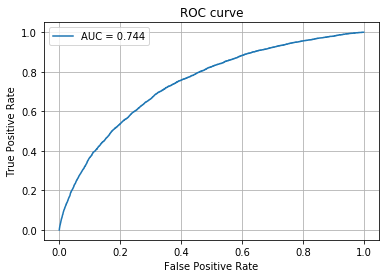

In [66]:
pred = logreg.predict_proba(X_test)[: , 1]
pred
#評価用モジュール
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
#ROC曲線プロット
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc_score = roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 2

In [68]:
predict_y = logreg.predict(df_test)
predict_y
pd.value_counts(predict_y)

0    48689
1       55
dtype: int64

In [69]:
df_test2 = pd.read_pickle('../Pickle/application_test.pkl') # SK_ID_CURRを結合するためだけにdf_test2を使う
df_test2['SK_ID_CURR']
predict_y = pd.Series(predict_y)
predict_y = pd.concat([df_test2['SK_ID_CURR'],predict_y],axis=1)
predict_y = pd.DataFrame(predict_y)
predict_y.columns = ['SK_ID_CURR','TARGET']
display(predict_y)

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
5,100042,0
6,100057,0
7,100065,0
8,100066,0
9,100067,0


In [70]:
type(predict_y)
predict_y.to_csv('../Output/submit.csv',index=None)

In [72]:
a = pd.read_csv('../Output/submit.csv') # 変えないと上書きされるので注意
pd.value_counts(a['TARGET'])

0    48689
1       55
Name: TARGET, dtype: int64

## 3

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)

logreg = LogisticRegression()
rfe = RFE(logreg, 5)
rfe.fit(X_train, y_train)

/home/ubuntu/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ubuntu/.pyenv/versions/anaconda3-2019.03/l

KeyboardInterrupt: 

In [ ]:
rfe.support_ #Trueになっているところが生き残った特徴量

In [ ]:
#選ばれた特徴量（Trueになったもの）のみ使って再度モデリングしてみる
X = df[[col for col in df.columns if col not in ['SkinThickness', 'Insulin', 'Age', 'Outcome']]]
y = df.Outcome

#標準化
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2019, test_size=0.20, stratify=y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

pred = logreg.predict_proba(X_test)[: , 1]

## 4